In [1]:
install.packages('quantmod')

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’





The downloaded binary packages are in
	/var/folders/r2/y9m75_w11cdbjpb1tfp78p3r0000gp/T//RtmpDZiIGS/downloaded_packages


In [2]:
library(dplyr)
library(ggplot2)
library(quantmod)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to

In [4]:
serie <- getSymbols('MCD', auto.assign = FALSE)
class(serie)
head(serie)
summary(serie)

[1] "xts" "zoo"

           MCD.Open MCD.High MCD.Low MCD.Close MCD.Volume MCD.Adjusted
2007-01-03    43.65    44.38   43.50     43.87    7579100     27.48584
2007-01-04    43.75    43.86   42.87     43.54    9776100     27.27907
2007-01-05    43.40    43.82   43.34     43.54    5701000     27.27907
2007-01-08    43.50    43.85   43.25     43.71    4538500     27.38559
2007-01-09    43.86    44.15   43.59     43.79    6832800     27.43571
2007-01-10    43.78    44.29   43.46     44.26    6374800     27.73018

     Index               MCD.Open         MCD.High         MCD.Low      
 Min.   :2007-01-03   Min.   : 42.50   Min.   : 43.09   Min.   : 42.31  
 1st Qu.:2011-02-09   1st Qu.: 77.03   1st Qu.: 77.32   1st Qu.: 76.55  
 Median :2015-03-24   Median : 99.95   Median :100.47   Median : 99.37  
 Mean   :2015-03-23   Mean   :130.95   Mean   :131.93   Mean   :129.98  
 3rd Qu.:2019-05-03   3rd Qu.:184.33   3rd Qu.:185.84   3rd Qu.:182.74  
 Max.   :2023-06-13   Max.   :298.63   Max.   :298.86   Max.   :296.30  
   MCD.Close        MCD.Volume        MCD.Adjusted   
 Min.   : 42.91   Min.   :  963200   Min.   : 26.88  
 1st Qu.: 76.95   1st Qu.: 3184975   1st Qu.: 54.44  
 Median : 99.96   Median : 4665400   Median : 79.04  
 Mean   :130.97   Mean   : 5511719   Mean   :113.11  
 3rd Qu.:184.43   3rd Qu.: 6873675   3rd Qu.:168.17  
 Max.   :298.07   Max.   :49724500   Max.   :296.50  

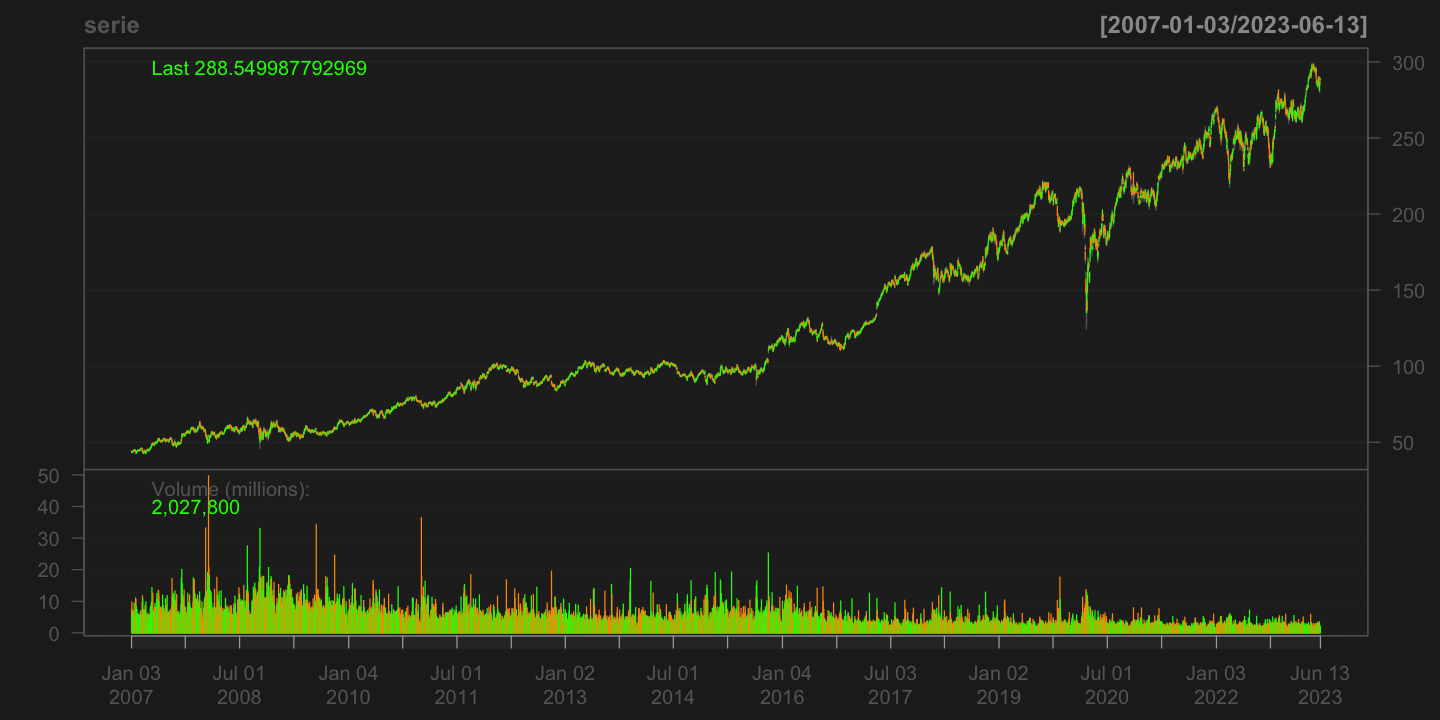

In [5]:
options(repr.plot.width=12, repr.plot.height=6)
#require(TTR)
chartSeries(serie)

In [8]:
install.packages('forecast')

also installing the dependencies ‘quadprog’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’





The downloaded binary packages are in
	/var/folders/r2/y9m75_w11cdbjpb1tfp78p3r0000gp/T//RtmpDZiIGS/downloaded_packages


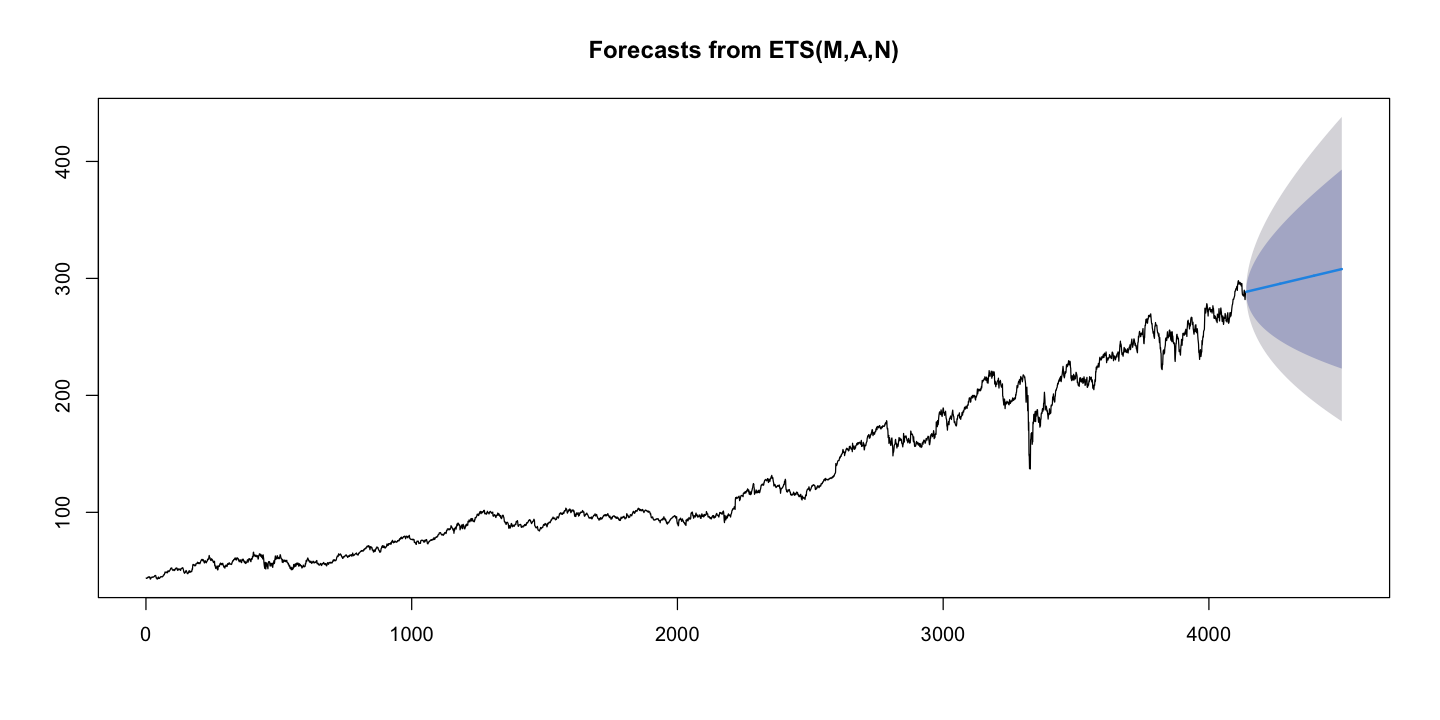

In [10]:
mcd_close <- Cl(serie)
mod_t <- forecast::ets(mcd_close)
plot(forecast::forecast(mcd_close, 360))

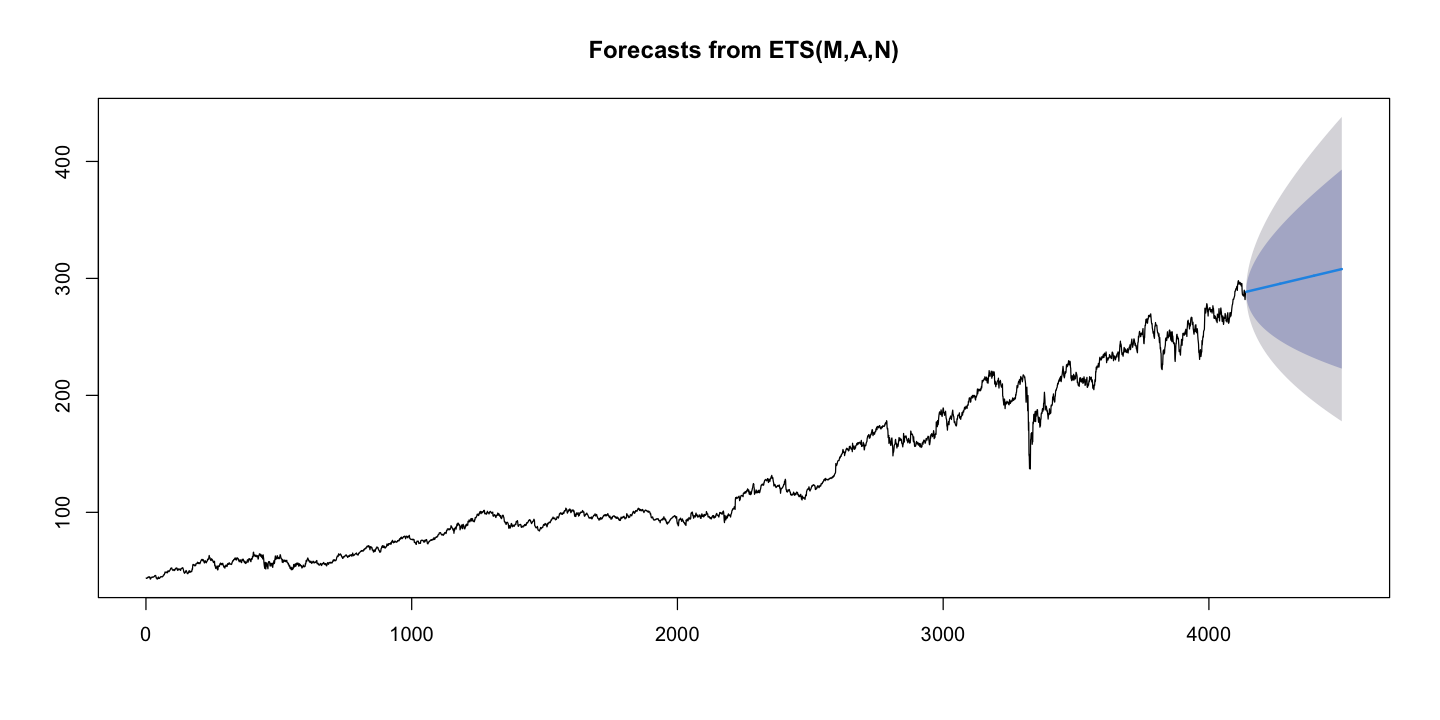

In [11]:
mcd_close <- Cl(serie)
mod_t <- forecast::ets(mcd_close)
plot(forecast::forecast(mod_t, 360))

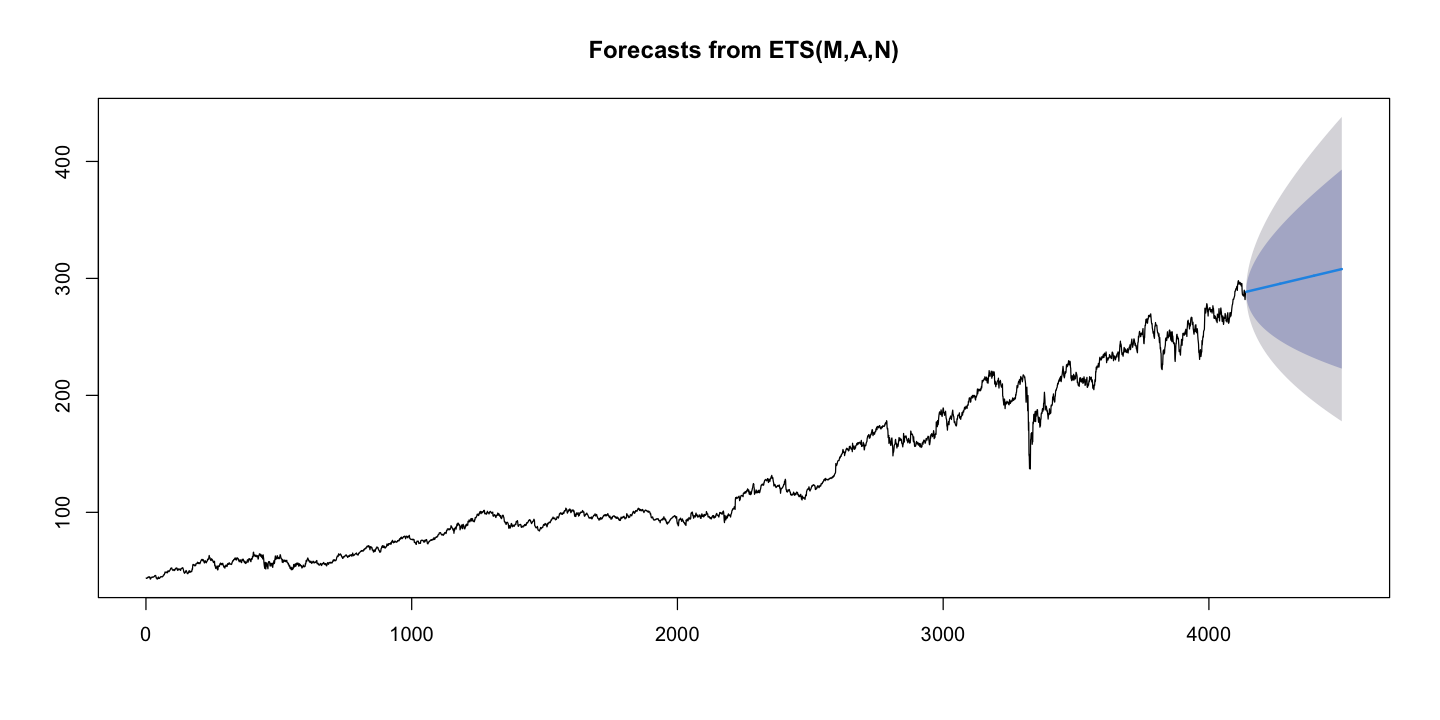

In [15]:
alpha <- mcd_close %>% 
    Cl() %>% 
    forecast::ets()
plot(forecast::forecast(alpha, 360))

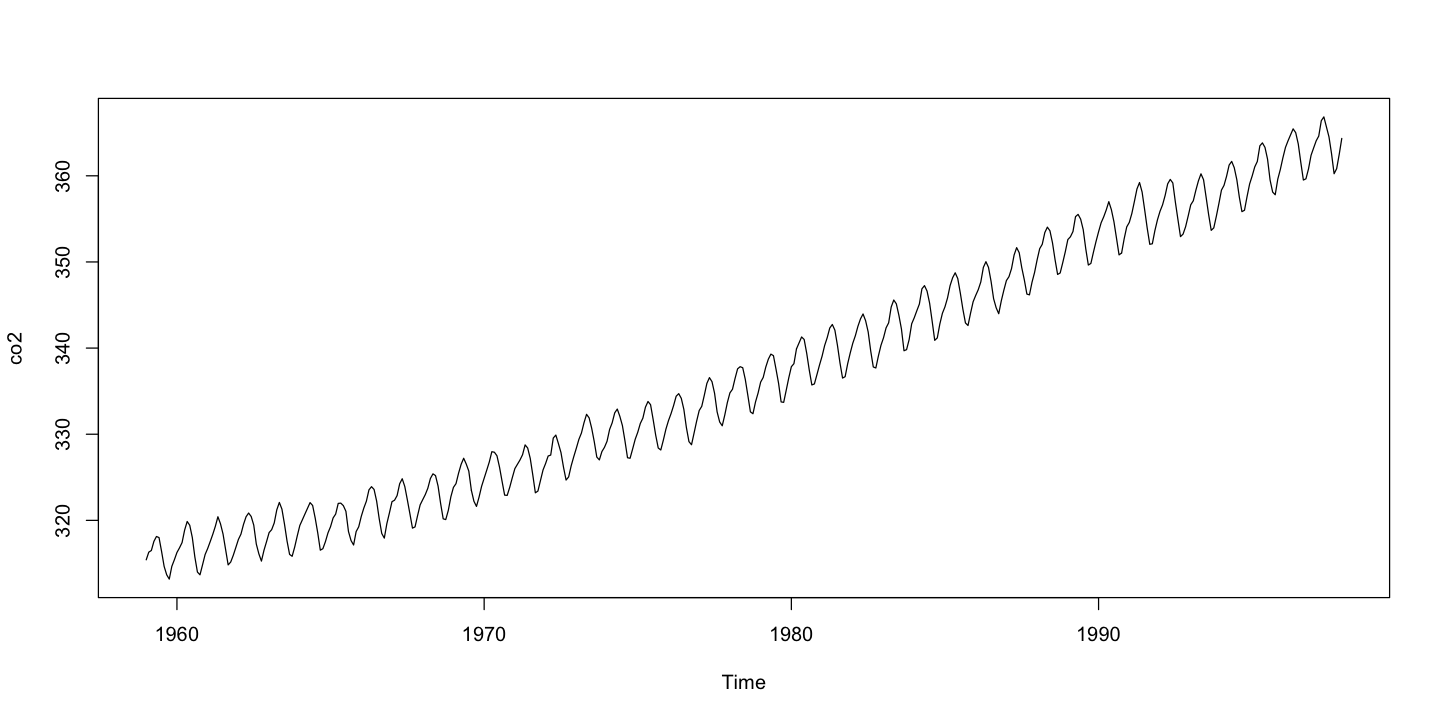

In [16]:
plot(co2)

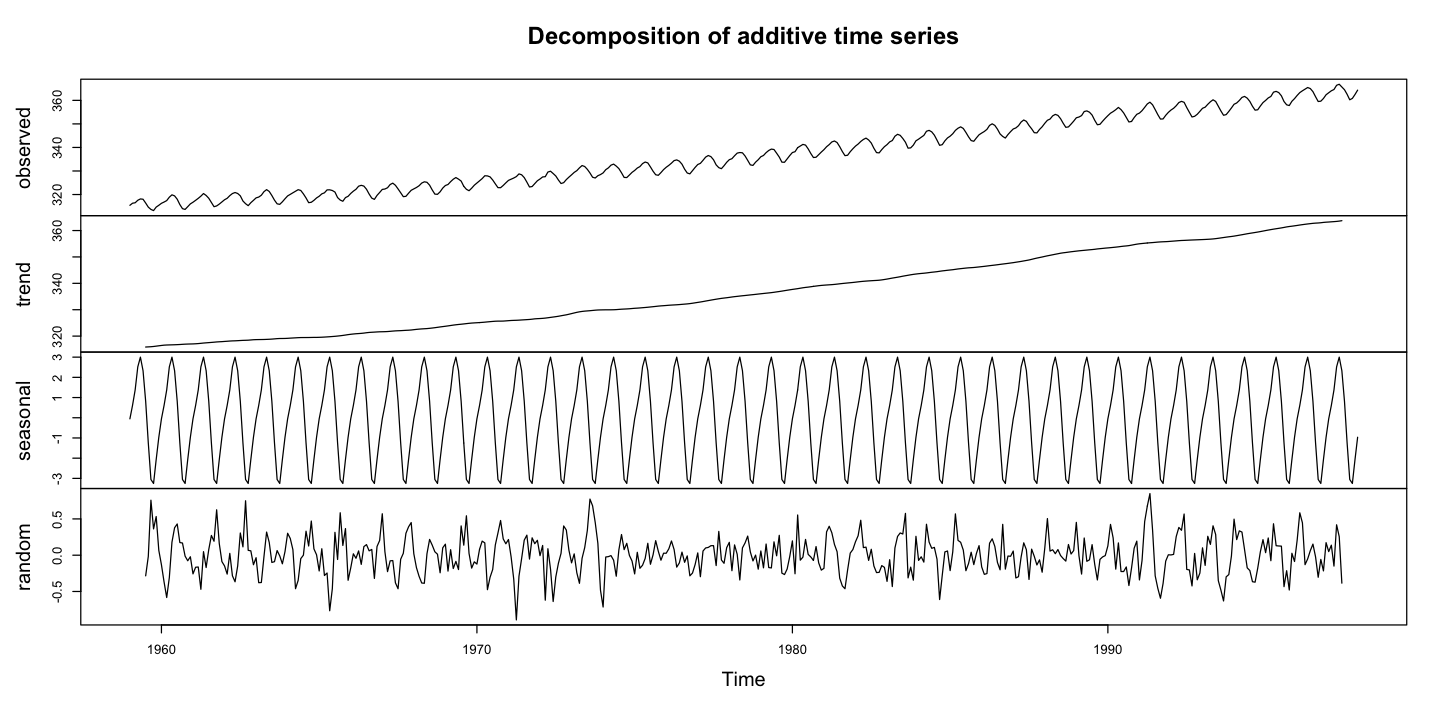

In [19]:
plot(decompose(co2))

In [24]:
serie_df <- data.frame(
    fecha = index(serie),
    coredata(serie)
)
head(serie_df)

,fecha,MCD.Open,MCD.High,MCD.Low,MCD.Close,MCD.Volume,MCD.Adjusted
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2007-01-03,43.65,44.38,43.50,43.87,7579100,27.48584
2,2007-01-04,43.75,43.86,42.87,43.54,9776100,27.27907
3,2007-01-05,43.40,43.82,43.34,43.54,5701000,27.27907
4,2007-01-08,43.50,43.85,43.25,43.71,4538500,27.38559
5,2007-01-09,43.86,44.15,43.59,43.79,6832800,27.43571
6,2007-01-10,43.78,44.29,43.46,44.26,6374800,27.73018


`geom_smooth()` using method = 'gam' and
formula = 'y ~ s(x, bs = "cs")'


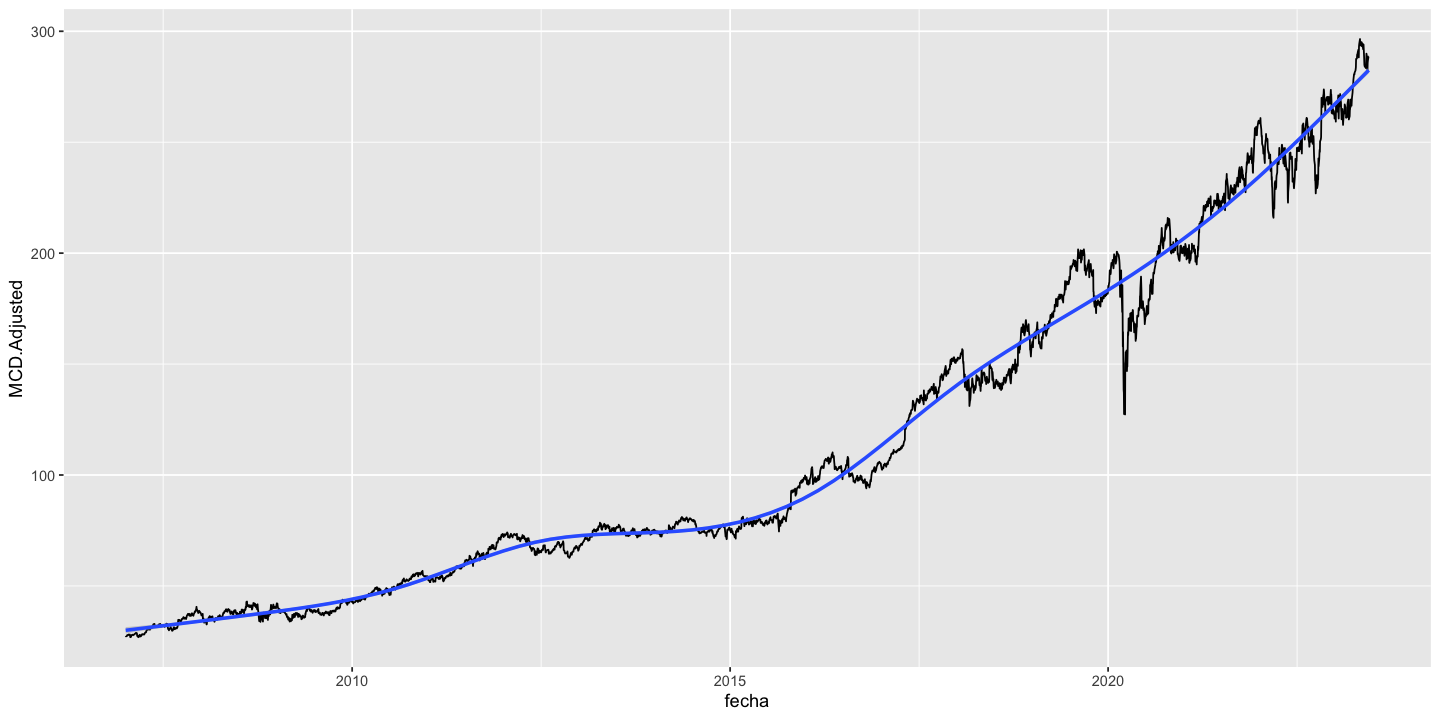

In [25]:
serie_df %>% 
    ggplot() +
    aes(x = fecha, y = MCD.Adjusted) +
    geom_line() +
    geom_smooth()

In [31]:
resumen <- serie_df %>% 
    mutate(year = lubridate::year(fecha)) %>% 
    group_by(year) %>% 
    summarise(
        mean_adjusted = mean(MCD.Adjusted), # Promedio
        sd_adjusted = sd(MCD.Adjusted), # Desviación estándar
        cv_adjusted = sd_adjusted/abs(mean_adjusted) # Coeficiente de variación
    )
resumen %>% arrange(cv_adjusted)

year,mean_adjusted,sd_adjusted,cv_adjusted
<dbl>,<dbl>,<dbl>,<dbl>
2013,74.24237,2.212966,0.02980732
2014,76.02900,2.484440,0.03267753
2016,101.24618,3.823310,0.03776252
2023,275.91863,12.431692,0.04505564
2012,68.33275,3.087862,0.04518861
2022,248.03350,12.765401,0.05146644
2018,147.64368,8.578461,0.05810246
2009,38.63734,2.303374,0.05961523
2008,37.81065,2.285102,0.06043541


Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


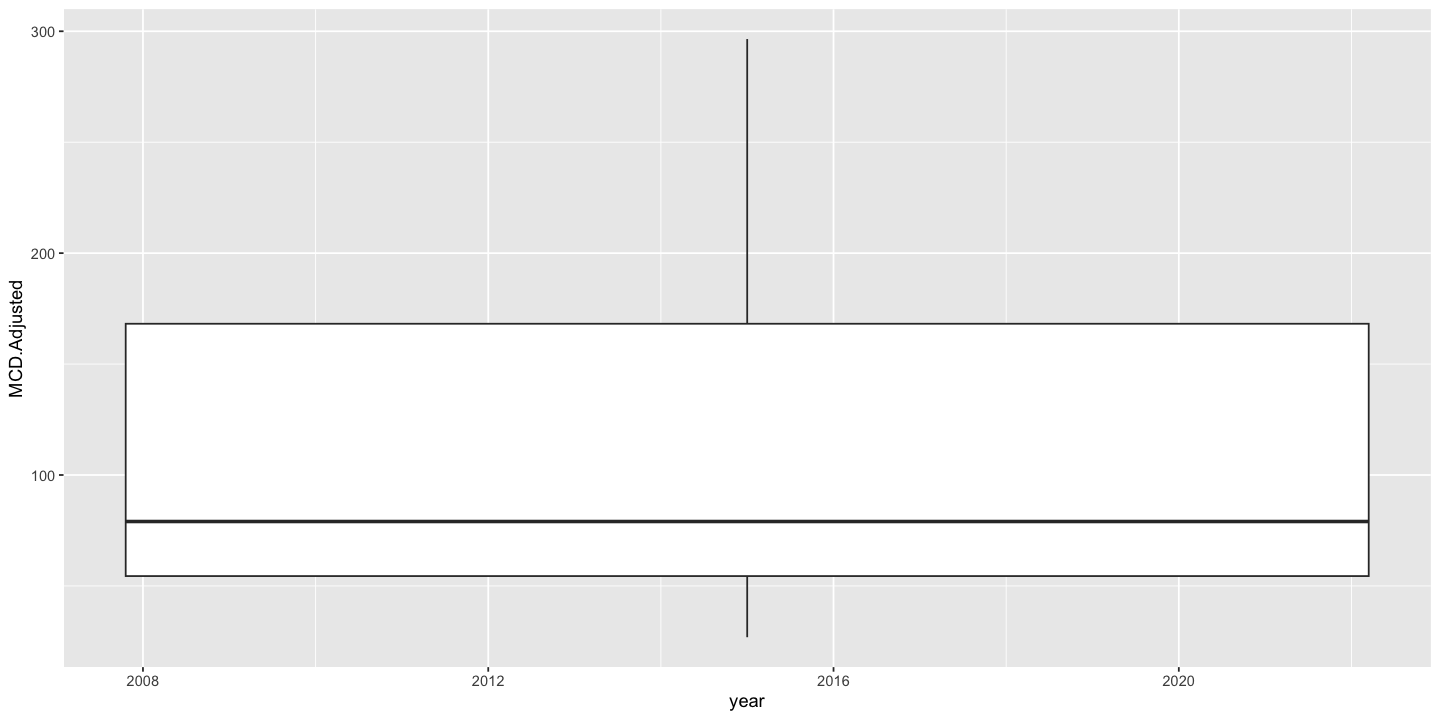

In [35]:
# No es el gráfico que estábamos buscando.

serie_df %>% 
    mutate(year = lubridate::year(fecha)) %>% 
    ggplot() +
    aes(x = year, y = MCD.Adjusted) +
    geom_boxplot()

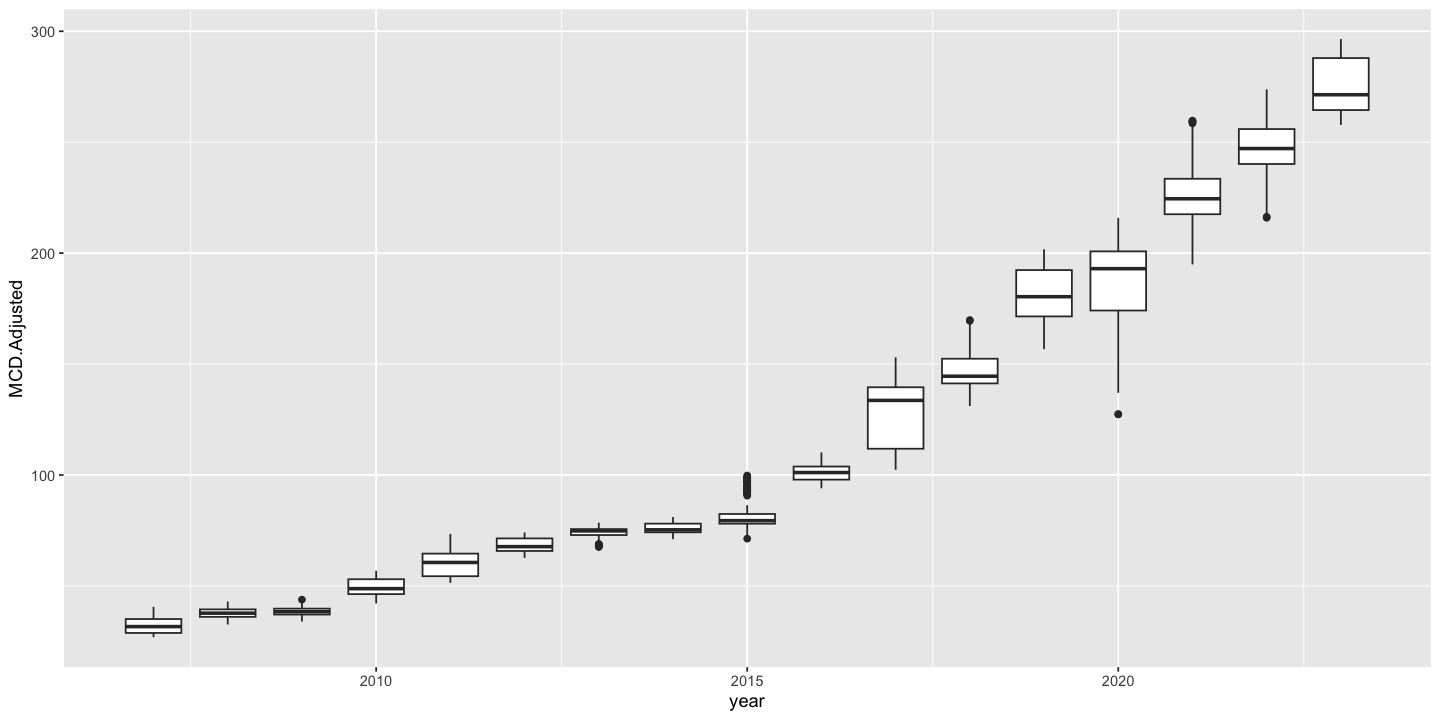

In [36]:
# Ahora separa los años, pero R no los identifica como una categoría.

serie_df %>% 
    mutate(year = lubridate::year(fecha)) %>% 
    ggplot() +
    aes(x = year, y = MCD.Adjusted, group = year) +
    geom_boxplot()

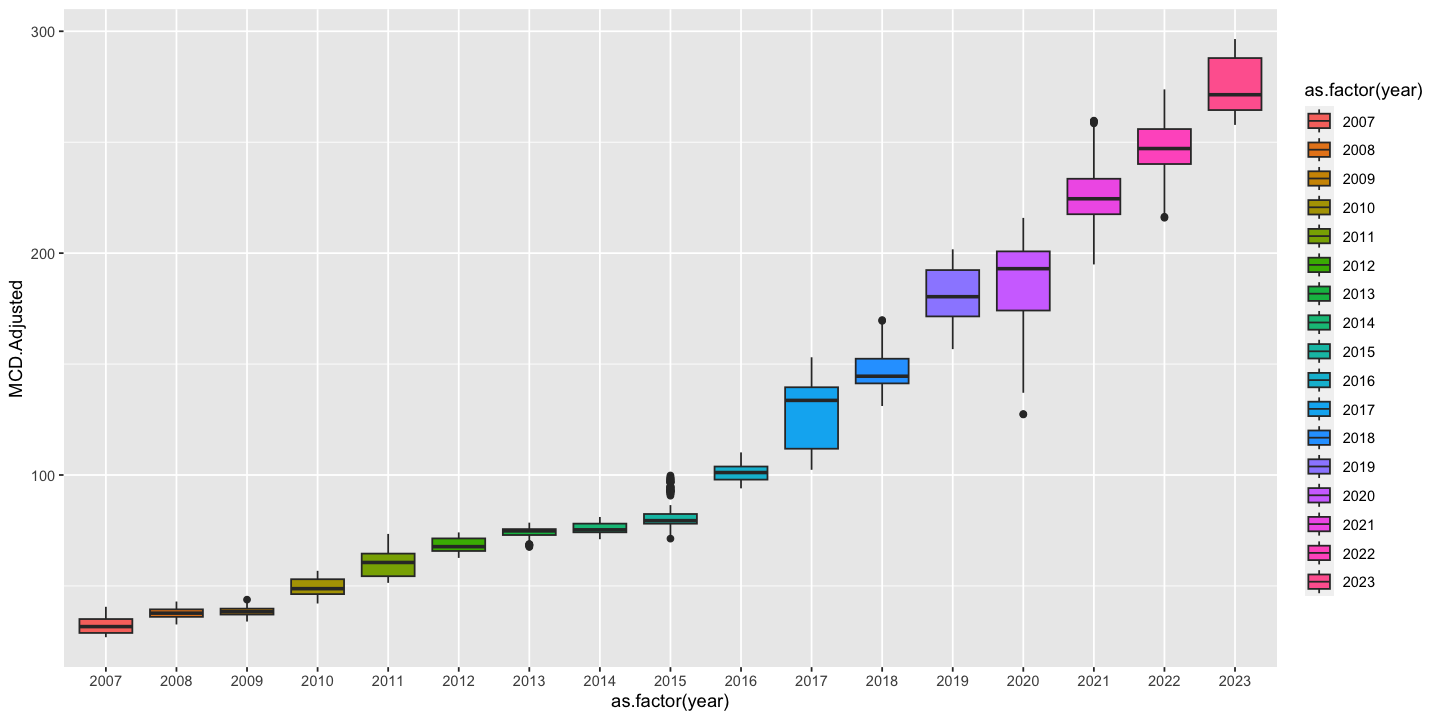

In [42]:
# Ahora R entiende los años como dato categórico y muestra en el eje X cada año.

serie_df %>% 
    mutate(year = lubridate::year(fecha)) %>% 
    ggplot() +
    aes(x = as.factor(year), y = MCD.Adjusted, fill = as.factor(year)) +
    geom_boxplot()

`stat_bin()` using `bins = 30`. Pick better
value with `binwidth`.


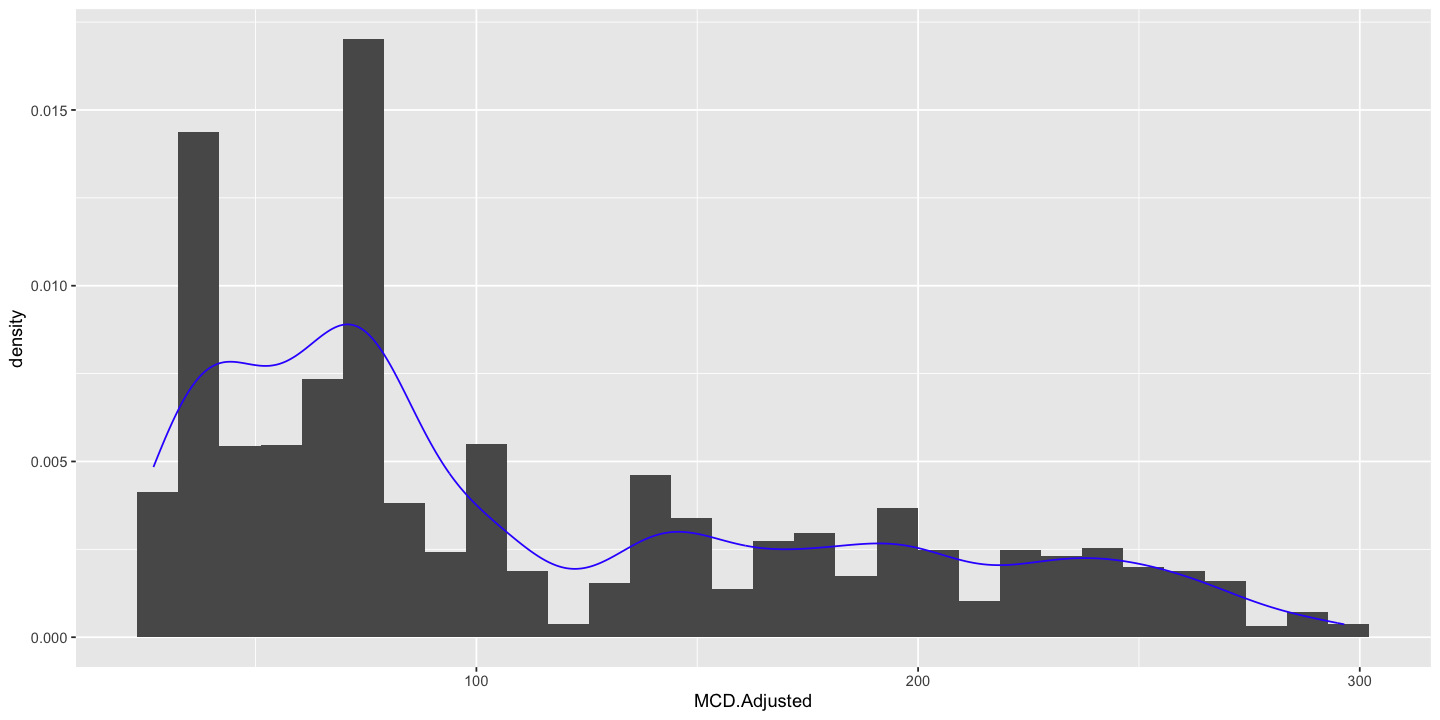

In [45]:
# La información del dataframe no tiene distribución normal.

serie_df %>% 
    ggplot() +
    aes(x = MCD.Adjusted, y = after_stat(density)) +
    geom_histogram() +
    geom_density(col = '#3333FF')

`stat_bin()` using `bins = 30`. Pick better
value with `binwidth`.


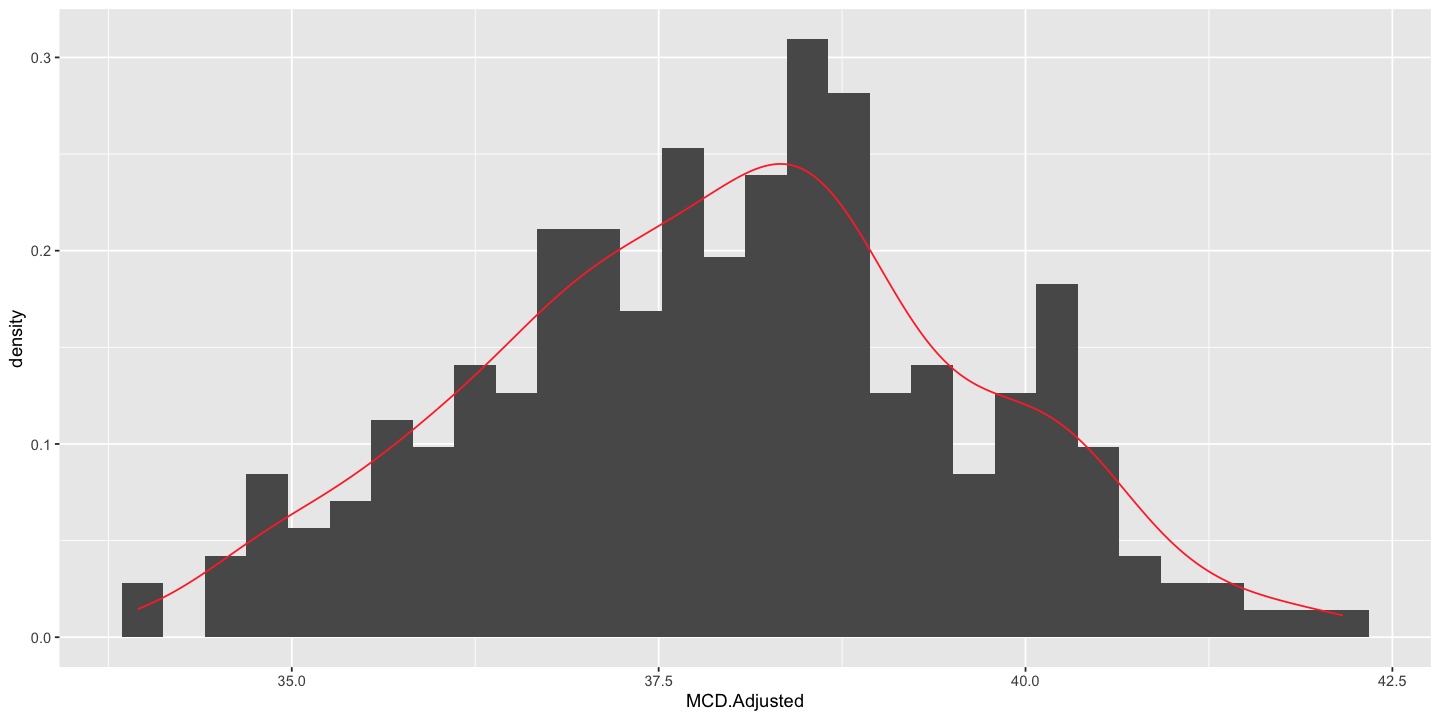

In [48]:
# ¿Y si vemos los datos dentro de un año?

auxiliar <- serie_df %>% 
    filter(fecha >= '2008-11-01' & fecha < '2009-11-01') 

auxiliar %>% 
    ggplot() +
    aes(x = MCD.Adjusted, y = after_stat(density)) +
    geom_histogram() +
    geom_density(col = '#FF3333')
    

`stat_bin()` using `bins = 30`. Pick better
value with `binwidth`.


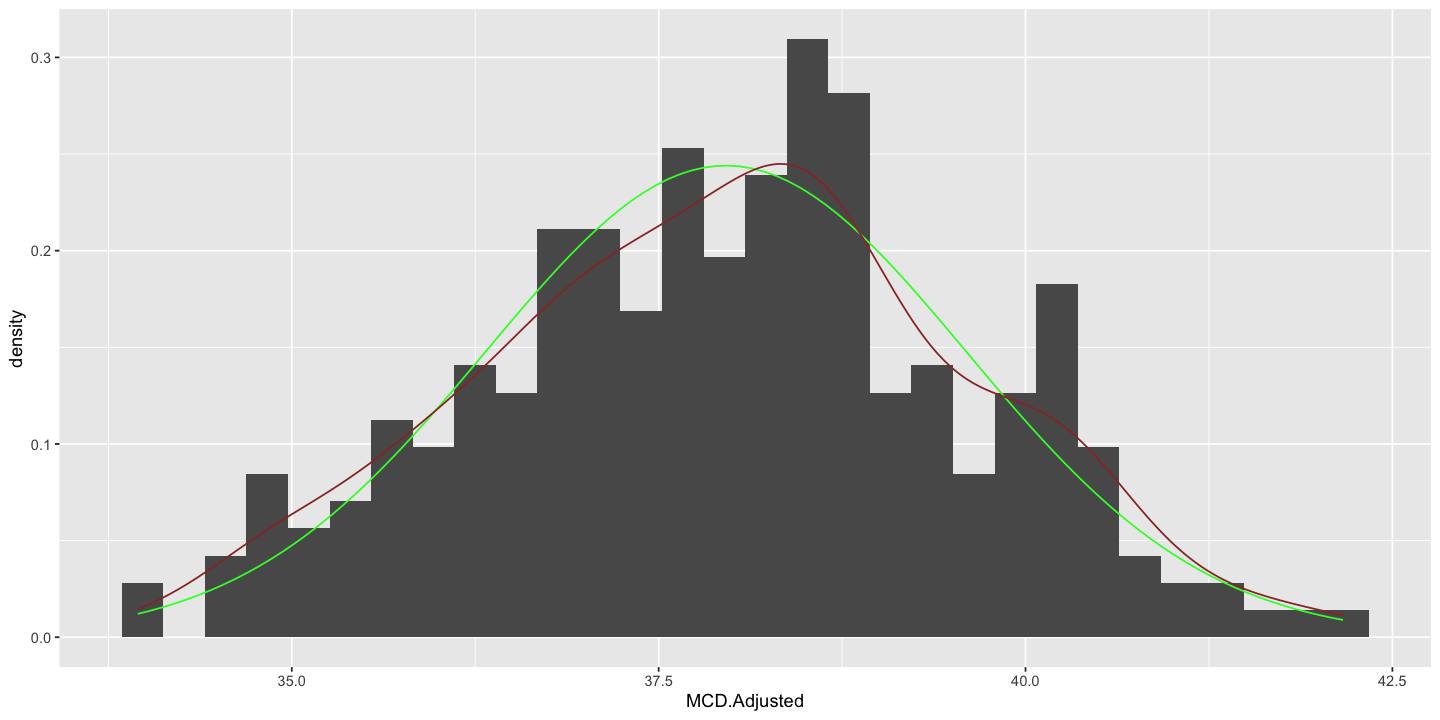

In [62]:
# ¿Qué tan normal es el gráfico anterior? Veámoslo de forma gráfica

auxiliar %>% 
    ggplot() +
    aes(x = MCD.Adjusted) +
    geom_histogram(aes(y = after_stat(density))) + # Al usar 'stat_function' se configura 'y' dentro de geom_histogram
    stat_function(
        fun = dnorm,
        args = list(mean = mean(auxiliar$MCD.Adjusted), sd = sd(auxiliar$MCD.Adjusted)),
        colour = '#33FF33'
    ) +
    geom_density(colour = '#993333')

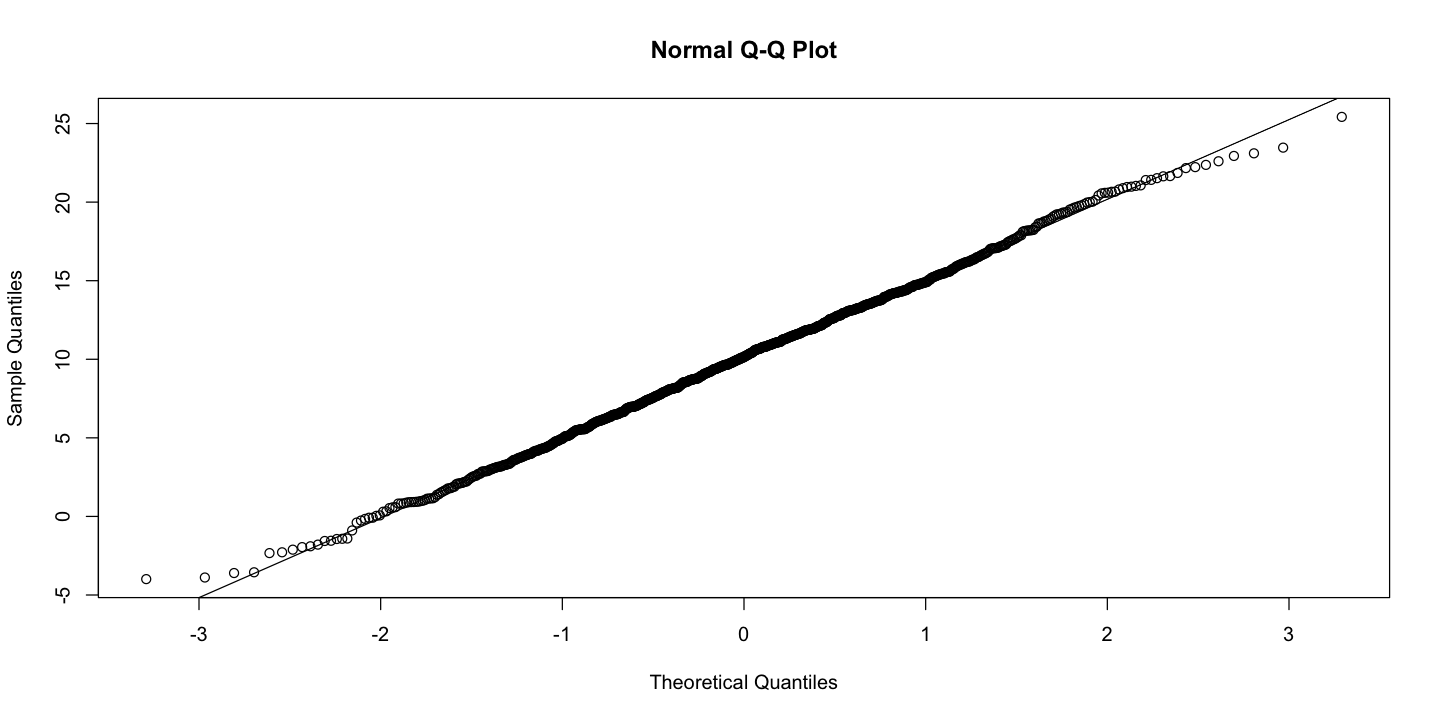

In [60]:
set.seed(6669)
m1_norm <- rnorm(1000, mean = 10, sd = 5)
qqnorm(m1_norm) # Contrasta los cuantiles de la muestra (eje Y) contra los cuantiles de la normal estándar (eje X)
qqline(m1_norm)

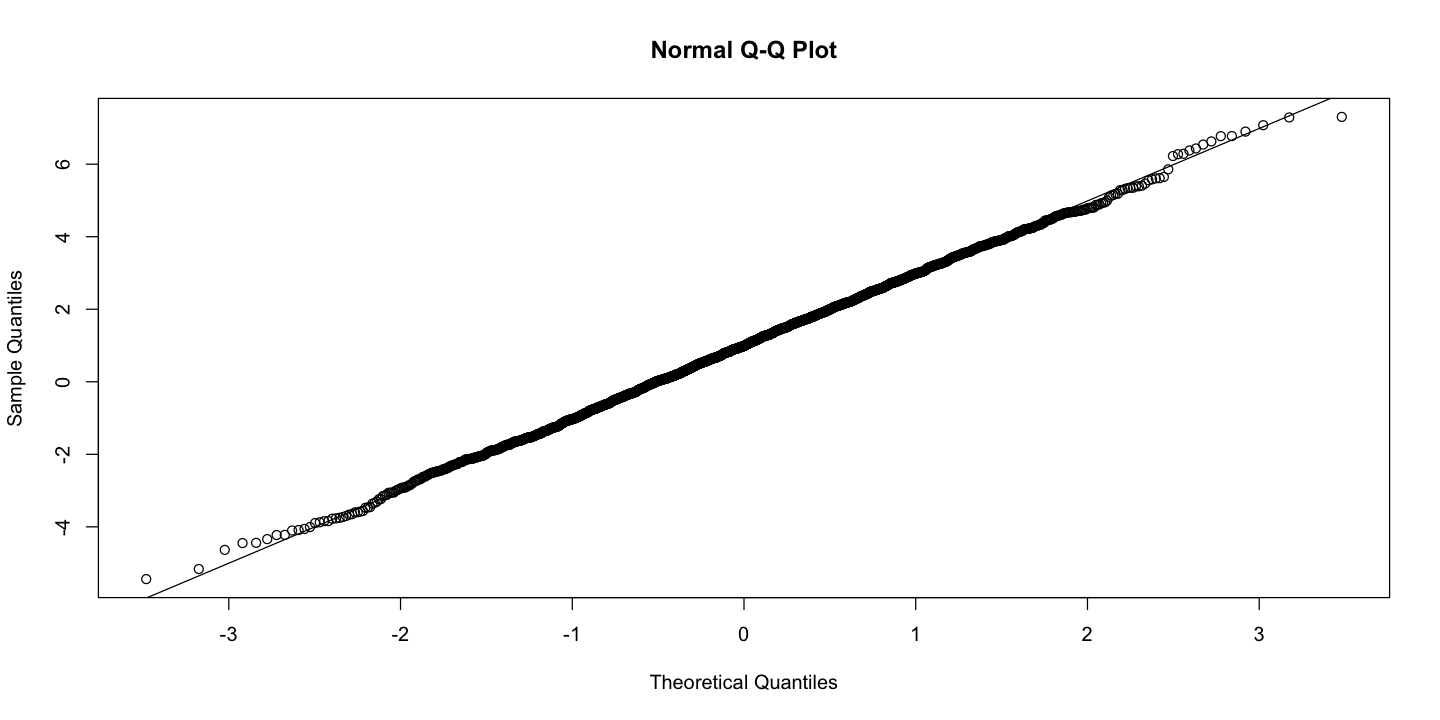

In [61]:
m2_norm <- rnorm(2000, mean = 1, sd = 2)
qqnorm(m2_norm)
qqline(m2_norm)

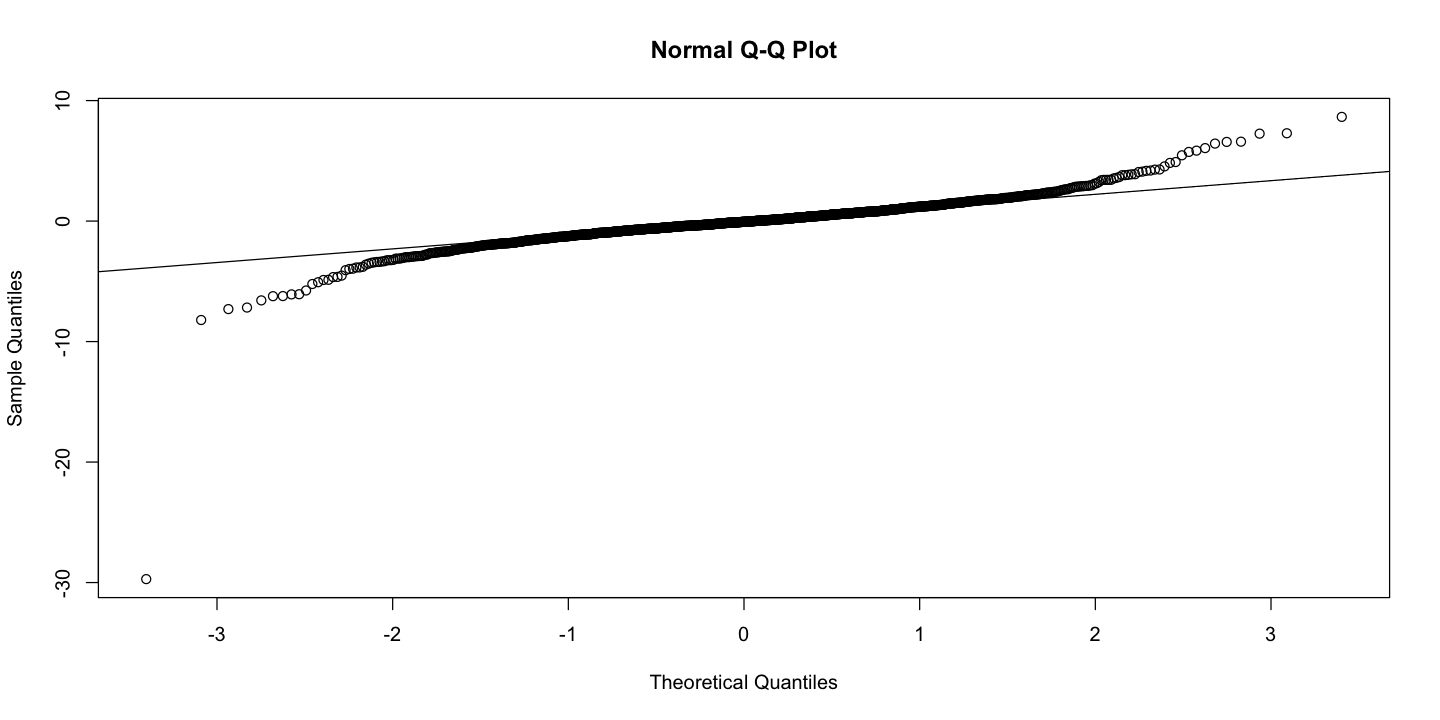

In [69]:
m3_t <- rt(1500, df = 3)
qqnorm(m3_t)
qqline(m3_t)

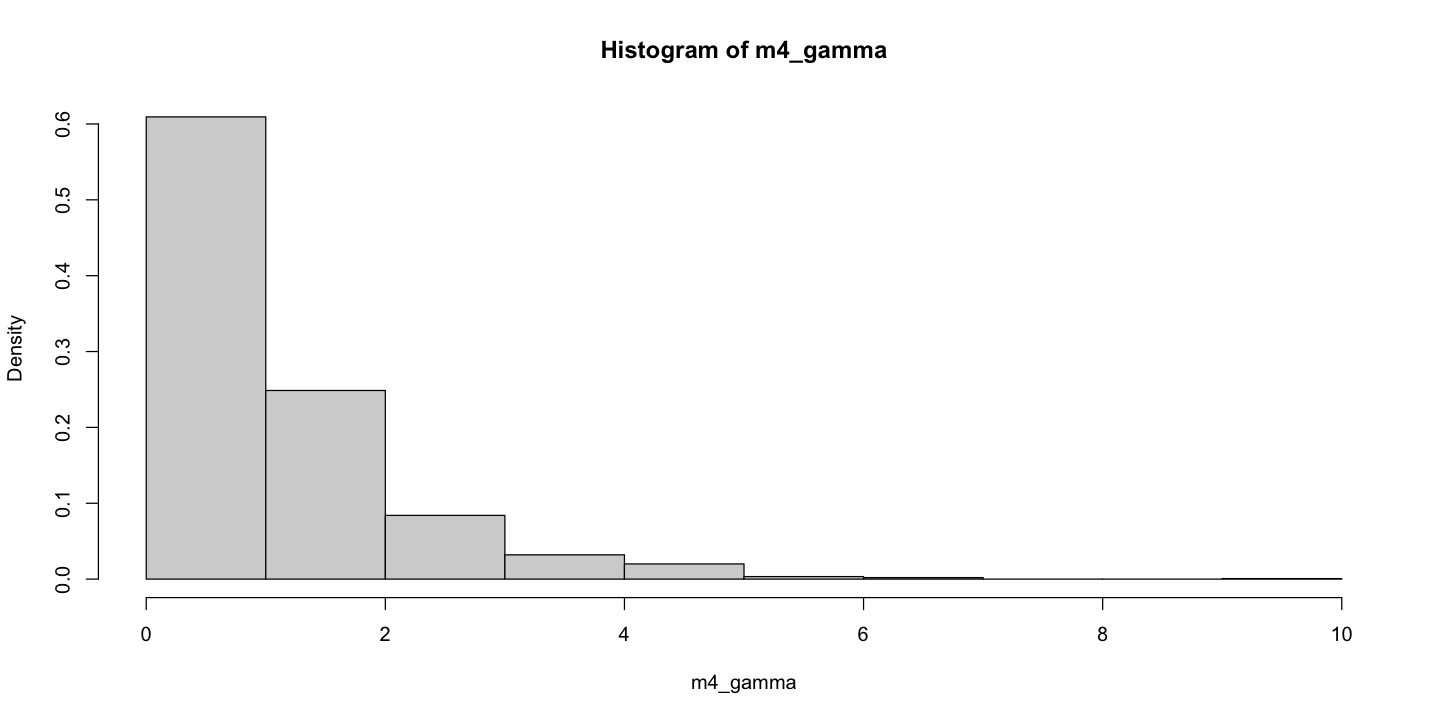

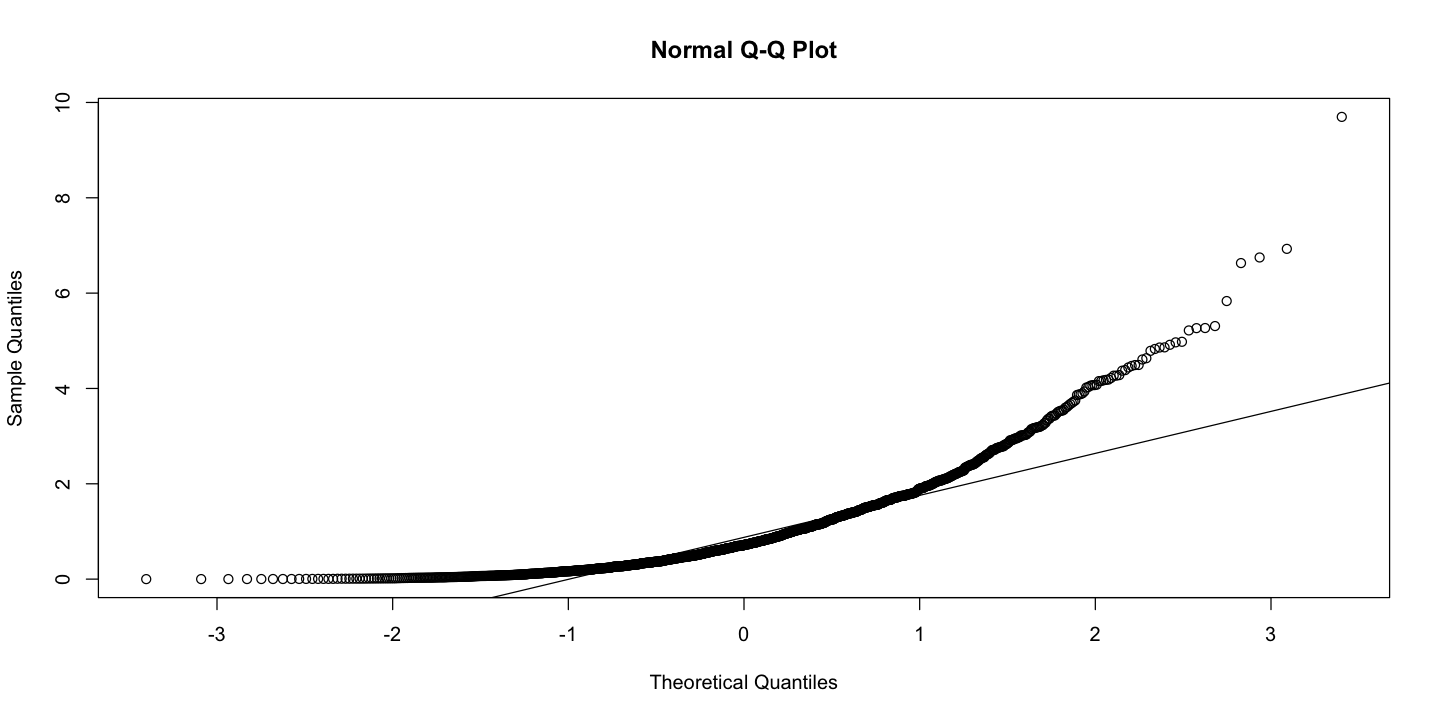

In [82]:
m4_gamma <- rgamma(1500, 1, 1)
hist(m4_gamma, freq = FALSE)
#curve(expr = dgamma(1500, 1, 1), add = TRUE, color = 'red')

qqnorm(m4_gamma)
qqline(m4_gamma)

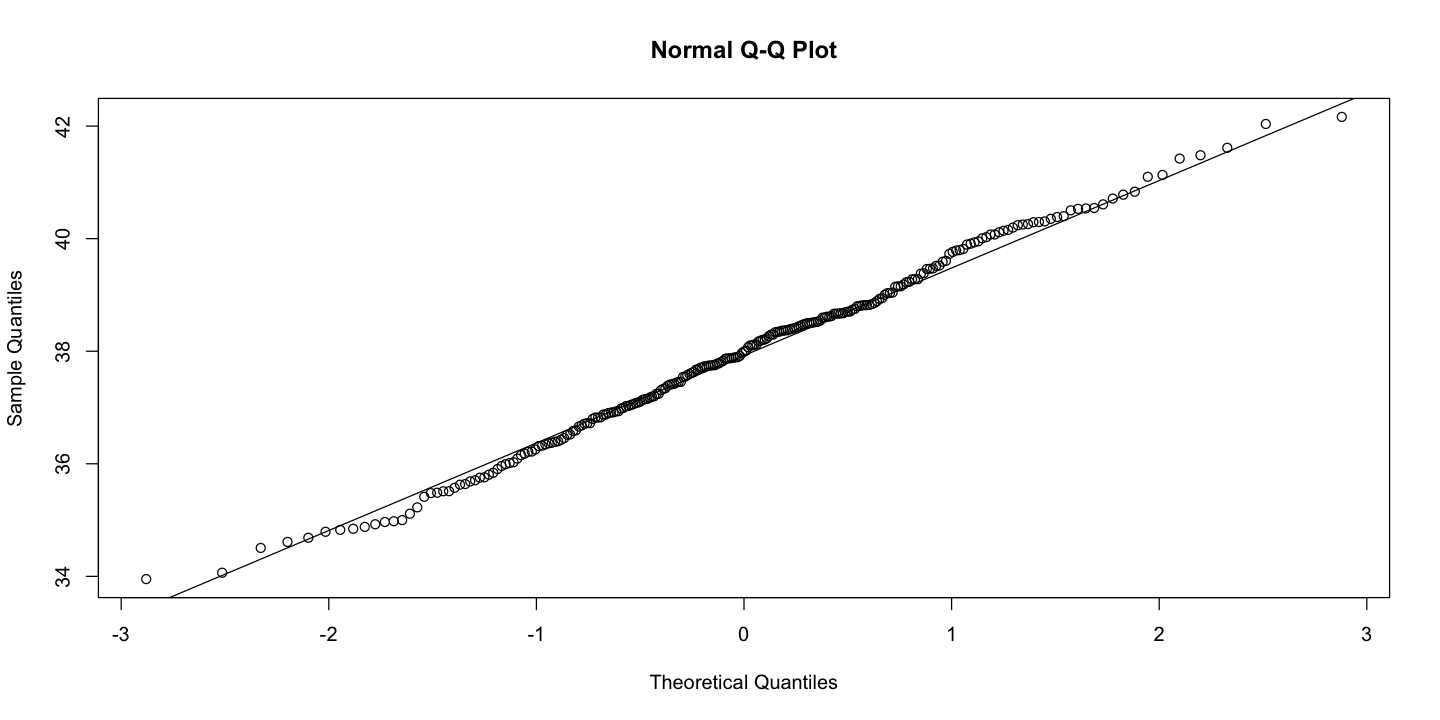

In [83]:
# Volvemos a los datos de McDonalds. Tiene un lejos a normalidad.

qqnorm(auxiliar$MCD.Adjusted)
qqline(auxiliar$MCD.Adjusted)

In [84]:
# El test de Shapiro-Wilk calcula a probabilidad de que H0 sea falso.
# En este contexto, H0 es que los datos consultados siguen una distribución normal.
# p-value bajos indican que H0 hay que rechazarla por H1 (la distribución no es normal).
# ¿Qué tan bajo p-value? lo definimos nosotros, pero generalmente se considera 5% (p-value < 0.05)

shapiro.test(m1_norm)


	Shapiro-Wilk normality test

data:  m1_norm
W = 0.99854, p-value = 0.5831


In [85]:
shapiro.test(m4_gamma)


	Shapiro-Wilk normality test

data:  m4_gamma
W = 0.81541, p-value < 2.2e-16


In [87]:
# Volvemos a los datos de McDonalds.
# Con un 5% de significancia (o 5% de confianza) podemos concluir que no se rechaza la afirmaciónde que
# los datos de los valores de MacDonalds para el año 2008-2009 siguen una distribución normal (H0).

shapiro.test(auxiliar$MCD.Adjusted)


	Shapiro-Wilk normality test

data:  auxiliar$MCD.Adjusted
W = 0.99486, p-value = 0.5619


In [91]:
# log retorno
# la función 'lag()' existe en dplyr y en stats, por lo que es mejor definir explícitamente la librería de origen.

lr <- auxiliar %>% 
    mutate(
        Adjusted_1 = lag(MCD.Adjusted),
        Retorno = MCD.Adjusted / Adjusted_1,
        log_ret = log(Retorno)
    )

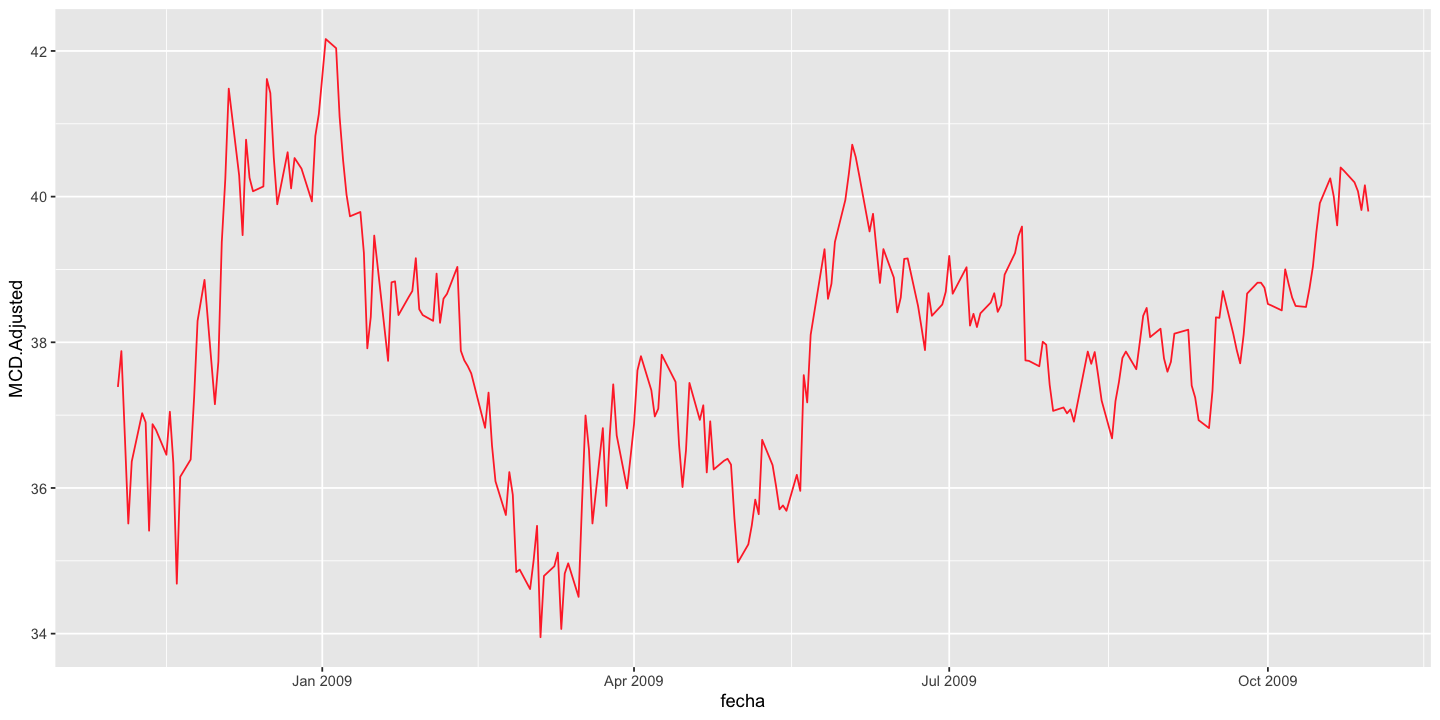

In [101]:
lr %>% 
    ggplot() +
    aes(x = fecha, y = MCD.Adjusted) +
    geom_line(colour = '#FF3333')

Warning message:
“Removed 1 row containing missing values
(`geom_line()`).”


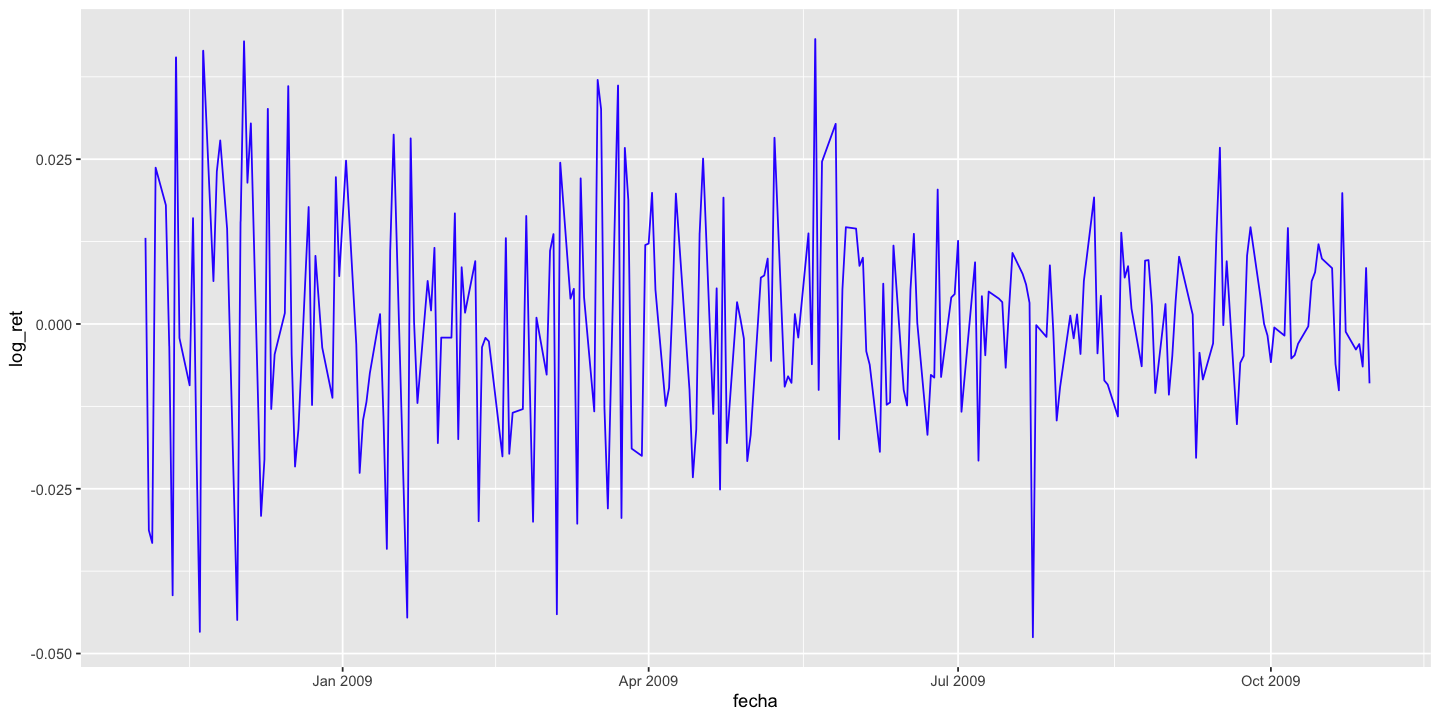

In [102]:
lr %>% 
    ggplot() +
    aes(x = fecha, y = log_ret) +
    geom_line(colour = '#3333FF')